## Assignment 2 | Deep Learning
#### Randeep Singh

### Initial importing of necessary libraries and mounting of Google Drive to access data file. Will also ignore any warnings that may appear after running cells.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/drive')

Mounted at /drive


#### This cell will import the data from the data.txt file stored in our Google Drive for us to use later on. 





In [3]:
data = pd.read_csv('/drive/MyDrive/Deep Learning/data.txt', sep='  ',header=None)
data.head()

,0,1
0,0.009519,-0.636513
1,0.977144,-0.823159
2,-0.001936,0.658520
3,0.626724,-0.770501
4,-0.694547,-0.028682


#### The data from the dataset is stored into an array called X.

In [4]:
X = data.values
X[:5]

array([[ 0.009519, -0.636513],
       [ 0.977144, -0.823159],
       [-0.001936,  0.65852 ],
       [ 0.626724, -0.770501],
       [-0.694547, -0.028682]])

#### The cell below is used to plot the data from the dataset.

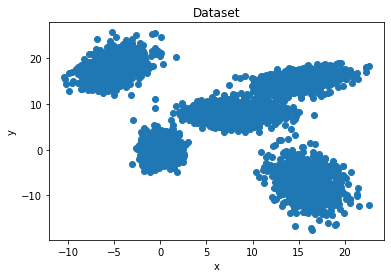

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset')
plt.show()

#### This function is the implementation of the Euclidean distance formula as it is used in the 'kmeans_fall2022' function below.

In [6]:
def calc_distance(X, center, cluster):
  return np.sum(np.sqrt((center[cluster.astype(int), 0]-X[:,0])**2 + (center[cluster.astype(int), 1]-X[:,1])**2))

#### This is the function to calculate the center of a cluster. The function will take a cluster as an input and return the center of the cluster. The center is calculated by taking the average of the x and y coordinates of all the points in the cluster, using the Euclidean distance formula. The Euclidean distance formula is: (x1-x2)^2 + (y1-y2)^2. The center is a tuple in the form of (x,y) where the center is the average of all the x coordinates and the average of all the y coordinates.

In [7]:
def kmeans_fall2022(X, k):
  # initialize variables
  center = np.random.rand(k, 2)
  cluster = np.zeros(X.shape[0])
  distance = 0

  while True:
    # update cluster
    for i, val in enumerate(X):
      cluster[i] = np.argmin(np.sqrt((center[:, 0]-val[0])**2 + (center[:, 1]-val[1])**2))

    # update center
    for i in range(k):
      center[i, 0] = np.mean(X[cluster==i, 0])
      center[i, 1] = np.mean(X[cluster==i, 1])

    # calculate distance
    new_distance = calc_distance(X, center, cluster)
    if new_distance == distance:
      break
    else:
      distance = new_distance

  return center, cluster

### Elbow method implementation to find the optimal k-value.

#### The elbow method function is defined below. This function will find the Euiclidean distance between each of the points and their respective assigned center for each k-value. The distance betweem the point and the slope at each k-value will be calculated and the first k-value will be returned where the difference in the slope value is < 0.1. This is the optimal k-value. 

In [8]:
def elbow_method(X, k):
    dist = []
    slope = []
    for i in range(1,k):
        # calculate kmeans
        centers, cluster = kmeans_fall2022(X, i)
        dist.append(calc_distance(X, centers, cluster))
        # calculate slope
        if i > 1:
            slope.append(dist[i-1]-dist[i-2])
    min_slope = min(slope)
    for i in range(2,len(slope)-1):
        if slope[i] >= min_slope*0.05:
            # plot the elbow
            plt.plot(range(1,k), dist)
            plt.xlabel('k')
            plt.ylabel('Distortion')
            plt.title('Elbow Method')
            plt.show()
            return i+2
    return k


#### Run the elbow method on 10 clusters to find the optimal k value

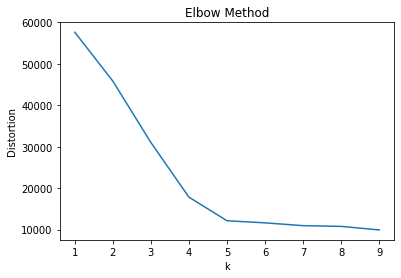

In [9]:
k = elbow_method(X,10)
centers, cluster = kmeans_fall2022(X, k)

#### Plot the dataset with the optimal k value. Each cluster is colored differently, and the centers of each cluster are marked with a black dot.

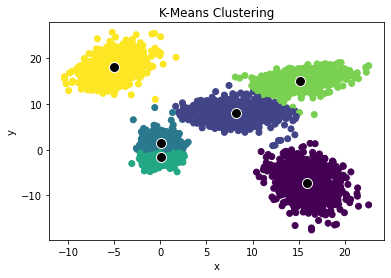

In [12]:

plt.scatter(X[:,0], X[:,1], c=cluster, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='black', marker='o', s=100, edgecolors='white')

plt.xlabel('x')
plt.ylabel('y')
plt.title('K-Means Clustering')
plt.show()